In [26]:
import numpy as np
import pandas as pd

In [27]:
path = "/Users/rss/Documents/ML/DeepLearning/Logistic_DL"

In [28]:
import os

print(os.listdir(path))


['.DS_Store', 'animals', 'venv', 'model.ipynb']


In [29]:
from PIL import Image
import matplotlib.pyplot as plt
import os

(-0.5, 511.5, 511.5, -0.5)

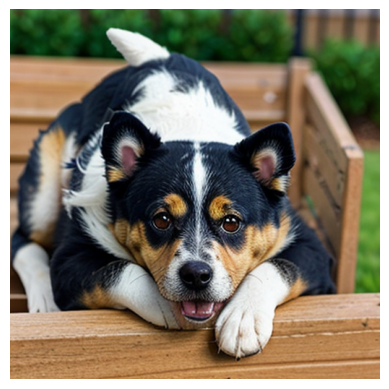

In [30]:
cat_dir = os.path.join(path, "animals/dog")
img_name = os.listdir(cat_dir)[0]
img_path = os.path.join(cat_dir, img_name)

img = Image.open(img_path)
plt.imshow(img)
plt.axis("off")

In [31]:
base_path = path + "/animals"

image_paths = []
labels = []

# cats = 0
cat_dir = os.path.join(base_path, "cat")
for img in os.listdir(cat_dir):
    image_paths.append(os.path.join(cat_dir, img))
    labels.append(0)

# dogs = 1

dog_dir = os.path.join(base_path, "dog")
for img in os.listdir(dog_dir):
  image_paths.append(os.path.join(dog_dir, img))
  labels.append(1)

print(f"Total Images: {len(image_paths)}")
print(f"Total Lables: {len(labels)}")

Total Images: 1000
Total Lables: 1000


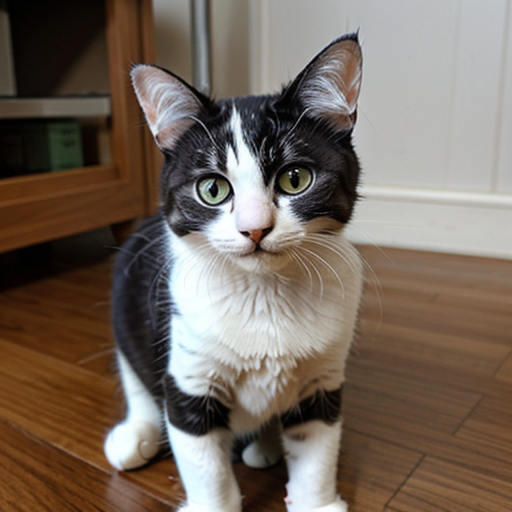

In [32]:
Image.open(image_paths[430])

In [33]:
image_paths = np.array(image_paths)
labels = np.array(labels)

indices = np.arange(len(image_paths))
np.random.shuffle(indices)

image_paths = image_paths[indices]
labels = labels[indices]

In [34]:
split_length = int(0.8 * len(image_paths))
X_train, X_test = image_paths[:split_length], image_paths[split_length:]
y_train, y_test = labels[:split_length], labels[split_length:]

In [35]:
def load_images(path, size=64):
  X = []
  for p in path:
    img = Image.open(p).convert("RGB")
    img = img.resize((size, size))
    img = np.array(img).reshape(-1)/255.0
    X.append(img)
  return np.array(X).T

In [36]:
X_train = load_images(X_train)
X_test = load_images(X_test)

y_train = y_train.reshape(1, -1)
y_test = y_test.reshape(1, -1)

In [37]:
print("X_train:", X_train.shape)
print("Y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("Y_test:", y_test.shape)


X_train: (12288, 800)
Y_train: (1, 800)
X_test: (12288, 200)
Y_test: (1, 200)


In [38]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [39]:
dim = X_train.shape[0]
W = np.zeros((dim,1))
b = 0


In [40]:
def propagate(W,b,X,y):
  m = X.shape[1]

  z = np.dot(W.T,X) + b
  a = sigmoid(z)

  cost = -1/m * np.sum(y*np.log(a) + (1-y)*np.log(1-a))

  dw = 1/m * np.dot(X,(a-y).T)
  db = 1/m * np.sum(a-y)

  cost = np.squeeze(cost)

  grads = {"dw":dw, "db":db}
  return grads, cost


In [41]:
def optimize(W, b, X, y, num_iterations, alpha, print_cost=False):
  costs = []
  for i in range(num_iterations):
    grads, cost = propagate(W,b,X,y)
    dw = grads["dw"]
    db = grads["db"]

    W -= alpha * dw
    b -= alpha * db
    if i % 100 == 0:
      costs.append(cost)
    if print_cost and i % 100 == 0:
      print("Cost after iteration %i: %f" %(i, cost))

    params = {"W":W, "b":b}
    grads = {"dw":dw, "db":db}

  return params, grads, costs

In [42]:
params, grads, costs = optimize(W, b, X_train, y_train, num_iterations=1500, alpha=0.001)

In [43]:
print ("w = " + str(params["W"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[ 0.00111874]
 [ 0.0080156 ]
 [ 0.00960536]
 ...
 [-0.0042457 ]
 [ 0.00354427]
 [ 0.00539383]]
b = 0.005978580520531708
dw = [[-1.47257394e-03]
 [-4.60538976e-03]
 [-4.87658624e-03]
 ...
 [ 7.66871017e-05]
 [-2.88780031e-03]
 [-2.85483680e-03]]
db = -0.00465256860992385


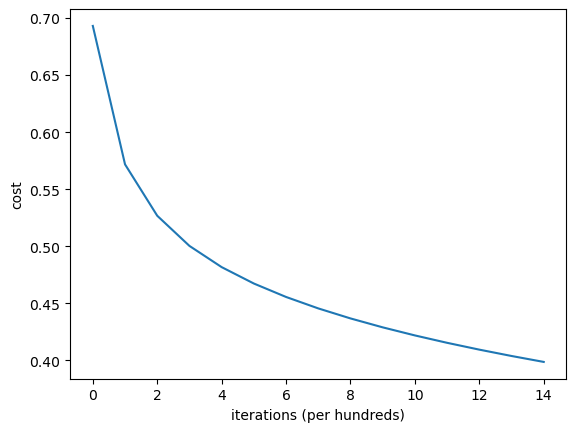

In [44]:
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.show()

In [45]:
def predict(W, b, X):
  m = X.shape[1]
  Y_prediction = np.zeros((1,m))
  W = W.reshape(X.shape[0], 1)

  z = np.dot(W.T,X) + b
  A = sigmoid(z)

  Y_prediction = (A >= 0.5) * 1.0

  return Y_prediction



In [46]:

w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]


In [47]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 1500, learning_rate = 0.001, print_cost = False):
  w, b = np.zeros((X_train.shape[0],1)), 0
  parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
  w = parameters["W"]
  b = parameters["b"]
  Y_prediction_test = predict(w, b, X_test)
  Y_prediction_train = predict(w, b, X_train)
  print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
  print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))


  d = {"costs": costs,
        "Y_prediction_test": Y_prediction_test,
        "Y_prediction_train" : Y_prediction_train,
        "w" : w,
        "b" : b,
        "learning_rate" : learning_rate,
        "num_iterations": num_iterations }

  return d

In [48]:
d = model(X_train, y_train, X_test, y_test)

train accuracy: 84.625 %
test accuracy: 80.0 %


y = 0, you predicted that it is a "cat" picture.


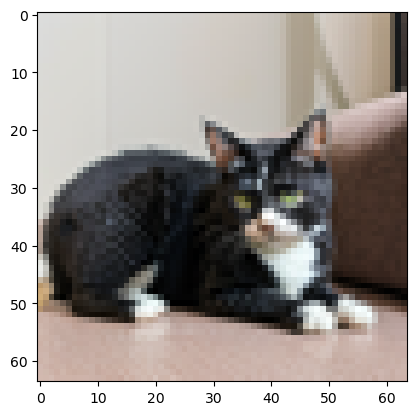

In [49]:
index = 32
num_px = 64
classes = ["cat", "dog"]
plt.imshow(X_test[:,index].reshape((num_px, num_px, 3)))
pred_class = int(d["Y_prediction_test"][0, index])
print(
    "y = " + str(y_test[0, index]) +
    ", you predicted that it is a \"" +
    classes[pred_class] +
    "\" picture."
)

learning rate is: 0.01
train accuracy: 87.375 %
test accuracy: 76.0 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 84.625 %
test accuracy: 80.0 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 75.75 %
test accuracy: 76.0 %

-------------------------------------------------------



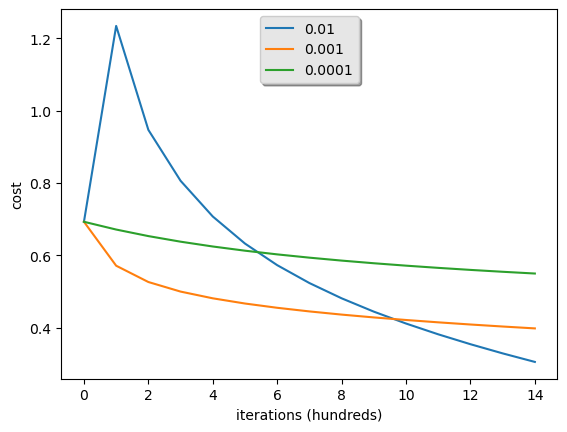

In [50]:

learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(X_train, y_train, X_test, y_test, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()